Part 1. Collect Cardio-Vascular Disease Associated SNPs

In [8]:
from snp_collection import create_rsid_df

In [9]:
data0 = create_rsid_df()
data0

,rs_id,nucleotide
0,rs4853365,G
1,rs1170780288,G
2,rs6842817,C
3,rs10518032,G
4,rs2405952,C
...,...,...
5741,rs61248729,T
5742,rs2071502,C
5743,rs145153053,G
5744,rs1396517,C


Part 2. Map SNPs to Proteins; Identify amino acid mutations based on SNP.

In [10]:
from protein_mapping import map_snps_to_proteins

In [11]:
data1 = map_snps_to_proteins(data0)
data1

,rs_id,nucleotide,transcript_id,amino_acids,gene_symbol,gene_symbol_source,protein_start,protein_end,variant_allele,mind_snp
0,rs429358,T,ENST00000252486,C/R,APOE,HGNC,130,130,C,C_130_R
1,rs429358,C,ENST00000252486,C/R,APOE,HGNC,130,130,C,C_130_R
2,rs429358,T,ENST00000425718,C/R,APOE,HGNC,130,130,C,C_130_R
3,rs429358,C,ENST00000425718,C/R,APOE,HGNC,130,130,C,C_130_R
4,rs429358,T,ENST00000434152,C/R,APOE,HGNC,156,156,C,C_156_R
...,...,...,...,...,...,...,...,...,...,...
1134,rs6265,T,ENST00000533246,V/M,BDNF,HGNC,66,66,T,V_66_M
1135,rs36127550,T,ENST00000228289,L/F,ZNF268,HGNC,679,679,T,L_679_F
1136,rs36127550,T,ENST00000536435,L/F,ZNF268,HGNC,679,679,T,L_679_F
1137,rs75387493,?,ENST00000295989,A/V,CAND2,HGNC,1019,1019,T,A_1019_V


Part 3. Collect protein sequences.

In [12]:
from fasta_collection import download_fastas_save_ids
data2 = download_fastas_save_ids(data1)
data2

,rs_id,nucleotide,transcript_id,amino_acids,gene_symbol,gene_symbol_source,protein_start,protein_end,variant_allele,mind_snp,accession_id
0,rs429358,T,ENST00000252486,C/R,APOE,HGNC,130,130,C,C_130_R,P02649
1,rs429358,C,ENST00000252486,C/R,APOE,HGNC,130,130,C,C_130_R,P02649
4,rs7412,?,ENST00000252486,R/C,APOE,HGNC,176,176,T,R_176_C,P02649
5,rs429358,T,ENST00000425718,C/R,APOE,HGNC,130,130,C,C_130_R,E7ERP7
6,rs429358,C,ENST00000425718,C/R,APOE,HGNC,130,130,C,C_130_R,E7ERP7
...,...,...,...,...,...,...,...,...,...,...,...
766,rs57659670,?,ENST00000389039,H/R,DUOX2,HGNC,678,678,C,H_678_R,X6RAN8
767,rs57659670,?,ENST00000603300,H/R,DUOX2,HGNC,678,678,C,H_678_R,Q9NRD8
768,rs6265,T,ENST00000533246,V/M,BDNF,HGNC,66,66,T,V_66_M,P23560
769,rs36127550,T,ENST00000536435,L/F,ZNF268,HGNC,679,679,T,L_679_F,Q14587


Part 4. Predict PTMs using wild-type and mutant sequences.

In [13]:
from mind_prediction import predict_all_ptms

In [14]:
predict_all_ptms(data2)

running command: python3 PTMSNP.py --pretrain_name saved_model/MIND_fifteenfold --data_path mind_files/fastas/A0A0C4DH41.fasta --res_path mind_files/results --snp P_62_S --n_fold 15
running command: python3 PTMSNP.py --pretrain_name saved_model/MIND_fifteenfold --data_path mind_files/fastas/A0A0C4DH41.fasta --res_path mind_files/results --snp P_62_A --n_fold 15
running command: python3 PTMSNP.py --pretrain_name saved_model/MIND_fifteenfold --data_path mind_files/fastas/A0AV96.fasta --res_path mind_files/results --snp G_469_R --n_fold 15
running command: python3 PTMSNP.py --pretrain_name saved_model/MIND_fifteenfold --data_path mind_files/fastas/A0AV96.fasta --res_path mind_files/results --snp G_469_R --n_fold 15
running command: python3 PTMSNP.py --pretrain_name saved_model/MIND_fifteenfold --data_path mind_files/fastas/A6NKF2.fasta --res_path mind_files/results --snp C_335_G --n_fold 15
running command: python3 PTMSNP.py --pretrain_name saved_model/MIND_fifteenfold --data_path mind_fi

Part 5. Identify inhibited/promoted PTMs.

In [30]:
from observe_results import create_results_df, save_results, filter_impacted_ptm_snps, plot_pairs

In [16]:
res_df = create_results_df(data2)
save_results(res_df, "all_results.tsv")
res_df

,ProteinID,Mutation,PTM,Mutant_Prob,Orig_Prob,mind_snp,rs_id,nucleotide,transcript_id,amino_acids,gene_symbol,gene_symbol_source,protein_start,protein_end,variant_allele,accession_id
0,A0A0C4DH41,P62S,2_Hydro_K,0.198529,0.227985,P_62_S,rs202117805,G,ENST00000390630,P/S,IGHV4-61,HGNC,62,62,A,A0A0C4DH41
1,A0A0C4DH41,P62S,32_Hydro_K,0.341750,0.359311,P_62_S,rs202117805,G,ENST00000390630,P/S,IGHV4-61,HGNC,62,62,A,A0A0C4DH41
2,A0A0C4DH41,P62S,64_Hydro_K,0.535165,0.592677,P_62_S,rs202117805,G,ENST00000390630,P/S,IGHV4-61,HGNC,62,62,A,A0A0C4DH41
3,A0A0C4DH41,P62S,85_Hydro_K,0.256956,0.282750,P_62_S,rs202117805,G,ENST00000390630,P/S,IGHV4-61,HGNC,62,62,A,A0A0C4DH41
4,A0A0C4DH41,P62S,96_Hydro_K,0.209395,0.220527,P_62_S,rs202117805,G,ENST00000390630,P/S,IGHV4-61,HGNC,62,62,A,A0A0C4DH41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252471,Q9Y6F6,I11V,884_glyco_ST,0.009157,0.009157,I_11_V,rs4909945,?,ENST00000531107,I/V,IRAG1,HGNC,11,11,C,Q9Y6F6
252472,Q9Y6F6,I11V,890_glyco_ST,0.001688,0.001688,I_11_V,rs4909945,?,ENST00000531107,I/V,IRAG1,HGNC,11,11,C,Q9Y6F6
252473,Q9Y6F6,I11V,893_glyco_ST,0.000056,0.000056,I_11_V,rs4909945,?,ENST00000531107,I/V,IRAG1,HGNC,11,11,C,Q9Y6F6
252474,Q9Y6F6,I11V,894_glyco_ST,0.000081,0.000081,I_11_V,rs4909945,?,ENST00000531107,I/V,IRAG1,HGNC,11,11,C,Q9Y6F6


In [17]:
impacted_df = filter_impacted_ptm_snps(res_df)
save_results(impacted_df, "impacted_results.tsv")
impacted_df

,ProteinID,Mutation,PTM,Mutant_Prob,Orig_Prob,mind_snp,rs_id,nucleotide,transcript_id,amino_acids,gene_symbol,gene_symbol_source,protein_start,protein_end,variant_allele,accession_id
31030,P02749,C325G,324_Hydro_K,0.627643,0.203354,C_325_G,rs1801689,A,ENST00000205948,C/G,APOH,HGNC,325,325,C,P02749
78141,Q07890,P191R,199_Phos_Y,0.695728,0.219286,P_191_R,rs72681869,C,ENST00000543680,P/R,SOS2,HGNC,191,191,C,Q07890
135103,Q8N3D4,R307L,310_Phos_ST,0.348485,0.979063,R_307_L,rs3741380,?,ENST00000309295,R/L,EHBP1L1,HGNC,307,307,T,Q8N3D4
194204,Q99700,S248T,248_Phos_ST,0.278700,0.928917,S_248_T,rs7969300,T,ENST00000550104,S/T,ATXN2,HGNC,248,248,G,Q99700
196065,Q9BYX4,A946T,944_glyco_N,0.976292,0.000297,A_946_T,rs1990760,T,ENST00000649979,A/T,IFIH1,HGNC,946,946,T,Q9BYX4
208962,Q9NR80,R61W,65_Phos_ST,0.169563,0.723806,R_61_W,rs35437121,?,ENST00000355771,R/W,ARHGEF4,HGNC,61,61,T,Q9NR80
219269,Q9P266,S1002T,1002_Phos_ST,0.203989,0.840871,S_1002_T,rs3739998,C,ENST00000375377,S/T,JCAD,HGNC,1002,1002,G,Q9P266
233065,Q9UKP4,G1414S,1412_glyco_N,0.974206,0.000247,G_1414_S,rs2929155,?,ENST00000388820,G/S,ADAMTS7,HGNC,1414,1414,T,Q9UKP4


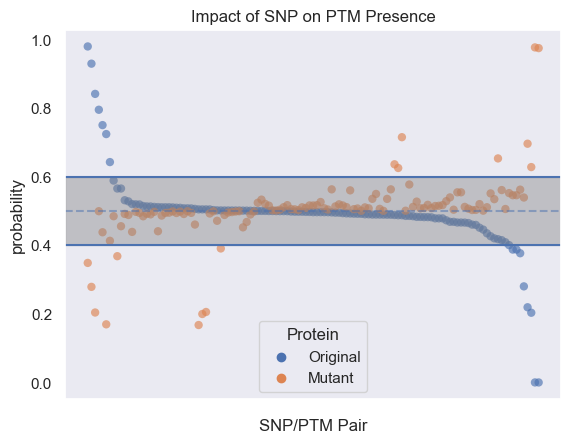

In [18]:
plot_pairs(res_df)

In [28]:
from observe_results import load_gwas_catalog, plot_disease_pie_chart

In [29]:
CATALOG_PATH = 'Impacted SNPs catalog.xlsx'
gwas_data = load_gwas_catalog(CATALOG_PATH)
gwas_data

,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,REGION,CHR_ID,CHR_POS,REPORTED GENE(S),MAPPED_GENE,UPSTREAM_GENE_ID,DOWNSTREAM_GENE_ID,SNP_GENE_IDS,UPSTREAM_GENE_DISTANCE,DOWNSTREAM_GENE_DISTANCE,STRONGEST SNP-RISK ALLELE,SNPS,MERGED,SNP_ID_CURRENT,CONTEXT,INTERGENIC,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV,MAPPED_TRAIT,MAPPED_TRAIT_URI,STUDY ACCESSION,GENOTYPING TECHNOLOGY,EFO PARENT TERM
0,2018-01-29,29212778,van der Harst P,2017-12-06,Circ Res,www.ncbi.nlm.nih.gov/pubmed/29212778,Identification of 64 Novel Genetic Loci Provid...,Coronary artery disease,"88,192 cases, 162,544 controls","34,541 cases, 261,984 controls",17q24.2,17,66214462,APOH,APOH,NaN,NaN,ENSG00000091583,NaN,NaN,rs1801689-A,rs1801689,0,1801689.0,missense_variant,0.0,0.9693,8.000000e-06,5.096910,NaN,0.081300,[0.046-0.117] unit decrease,NR [8041861] (imputed),N,coronary artery disease,http://www.ebi.ac.uk/efo/EFO_0001645,GCST005196,Genome-wide genotyping array,Cardiovascular disease
1,2023-01-20,36323703,Patrick MT,2022-11-02,Nat Commun,www.ncbi.nlm.nih.gov/pubmed/36323703,Shared genetic risk factors and causal associa...,Psoriasis or coronary artery disease,"11,024 psoriasis cases, 60,801 coronary artery...",NaN,2q24.2,2,162267541,NaN,IFIH1,NaN,NaN,ENSG00000115267,NaN,NaN,rs1990760-T,rs1990760,0,1990760.0,missense_variant,0.0,0.56,1.000000e-18,18.000000,NaN,1.100000,NaN,NR [8067837] (imputed),N,"psoriasis, coronary artery disease","http://www.ebi.ac.uk/efo/EFO_0000676, http://w...",GCST90244705,Genome-wide genotyping array,Cardiovascular disease
2,2022-08-19,35915156,Tcheandjieu C,2022-08-01,Nat Med,www.ncbi.nlm.nih.gov/pubmed/35915156,Large-scale genome-wide association study of c...,Coronary artery disease,"12,117 Hispanic cases, 44,853 Hispanic controls",NaN,15q25.1,15,78765671,NaN,ADAMTS7,NaN,NaN,ENSG00000136378,NaN,NaN,rs2929155-?,rs2929155,0,2929155.0,missense_variant,0.0,NR,7.000000e-06,5.154902,NaN,0.074300,[0.042-0.107] unit decrease,Affymetrix [NR] (imputed),N,coronary artery disease,http://www.ebi.ac.uk/efo/EFO_0001645,GCST90132303,Genome-wide genotyping array,Cardiovascular disease
3,2021-07-01,33201861,Lahm H,2020-11-17,J Clin Invest,www.ncbi.nlm.nih.gov/pubmed/33201861,Congenital heart disease risk loci identified ...,Congenital left-sided heart lesions,"326 European ancestry cases, 8,486 European an...",NaN,NaN,NaN,NaN,ARHGEF4,NaN,NaN,NaN,NaN,NaN,NaN,rs35437121-?,rs35437121,0,35437121.0,NaN,1.0,NaN,4.000000e-08,7.397940,NaN,2.270000,[1.68-3.03],"Affymetrix, Illumina [9216527] (imputed)",N,congenital left-sided heart lesions,http://www.ebi.ac.uk/efo/EFO_0005938,GCST011986,Genome-wide genotyping array,Cardiovascular disease
4,2011-01-06,21088011,Erdmann J,2010-11-18,Eur Heart J,www.ncbi.nlm.nih.gov/pubmed/21088011,Genome-wide association study identifies a new...,Coronary heart disease,"1,157 European ancestry cases, 1,748 European ...","7,887 European ancestry cases, 8,244 European ...",10p11.23,10,30027143,KIAA1462,JCAD,NaN,NaN,ENSG00000165757,NaN,NaN,rs3739998-C,rs3739998,0,3739998.0,missense_variant,0.0,0.44,1.000000e-11,11.000000,NaN,1.150000,[1.11-1.20],Affymetrix [254558],N,coronary artery disease,http://www.ebi.ac.uk/efo/EFO_0001645,GCST000875,Genome-wide genotyping array,Cardiovascular disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,2022-07-20,35285134,Temprano-Sagrera G,2022-03-14,J Thromb Haemost,www.ncbi.nlm.nih.gov/pubmed/35285134,Multi-phenotype analyses of hemostatic traits ...,Coronary artery disease or von Willebrand fact...,"172,122 European, South Asian or East Asian CA...",NaN,6q25.3,6,159821455,NaN,PNLDC1 - MAS1,ENSG00000146453,ENSG00000130368,NaN,751.0,69533.0,rs9986540-?,rs9986540,0,9986540.0,downstream_gene_variant,1.0,NR,1.000000e-15,15.000000,NaN,NaN

c:\Local Disk D\Documents\School\_Ping_Lab\.venv\Lib\site-packages\pandas\plotting\_matplotlib\core.py:807: UserWarning: The label '_nolegend_' of <matplotlib.patches.Wedge object at 0x000002227AB12050> starts with '_'. It is thus excluded from the legend.
  ax.legend(handles, labels, loc="best", title=title)
c:\Local Disk D\Documents\School\_Ping_Lab\.venv\Lib\site-packages\pandas\plotting\_matplotlib\core.py:807: UserWarning: The label '_nolegend_' of <matplotlib.patches.Wedge object at 0x000002227AB53250> starts with '_'. It is thus excluded from the legend.
  ax.legend(handles, labels, loc="best", title=title)
c:\Local Disk D\Documents\School\_Ping_Lab\.venv\Lib\site-packages\pandas\plotting\_matplotlib\core.py:807: UserWarning: The label '_nolegend_' of <matplotlib.patches.Wedge object at 0x000002227AB78A50> starts with '_'. It is thus excluded from the legend.
  ax.legend(handles, labels, loc="best", title=title)
c:\Local Disk D\Documents\School\_Ping_Lab\.venv\Lib\site-packages\

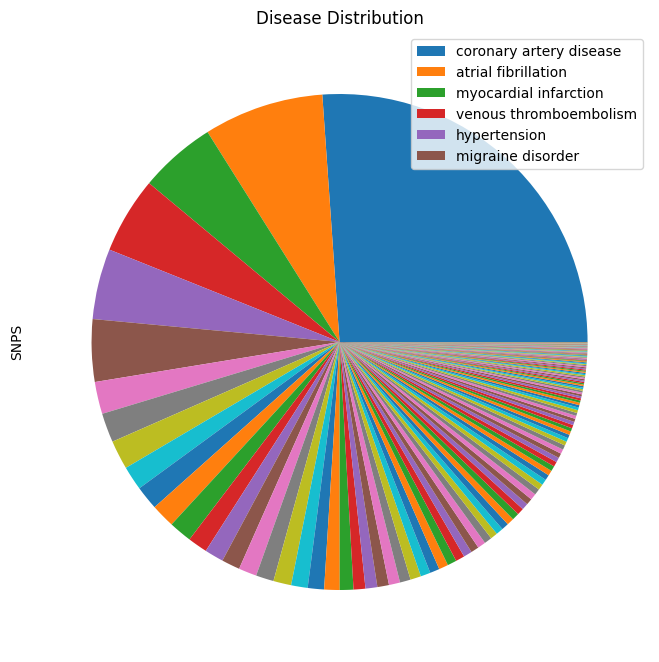

In [100]:
plot_disease_pie_chart(gwas_data)

In [97]:
plot_data = gwas_data[['MAPPED_TRAIT', 'SNPS']].groupby(by='MAPPED_TRAIT').nunique()
plot_data

,SNPS
MAPPED_TRAIT,
AL amyloidosis,10
"AL amyloidosis, IgG isotype profile measurement",2
"AL amyloidosis, kidney amyloid deposition measurement",1
Abdominal Aortic Aneurysm,48
"Alzheimer disease, small vessel stroke",1
...,...
"venous thromboembolism, tissue plasminogen activator measurement",18
"venous thromboembolism, von Willebrand factor measurement",32
ventricular ectopy,4


In [98]:
plot_data = gwas_data[['MAPPED_TRAITS', 'SNPS']]
plot_data.set_index('MAPPED_TRAITS')

KeyError: "['MAPPED_TRAITS'] not in index"

In [ ]:
plot_disease_pie_chart(gwas_data)

TypeError: '<' not supported between instances of 'str' and 'int'